Process ID                            0
BPR Implementation                    0
Project Complexity                    0
Cycle Time (days)                     0
Cost (USD)                            0
Defect Density (defects/KLOC)         0
Customer Satisfaction (1-5)           0
Employee Productivity (tasks/hour)    0
Resource Utilization (%)              0
dtype: int64
Process ID                             object
BPR Implementation                     object
Project Complexity                     object
Cycle Time (days)                       int64
Cost (USD)                              int64
Defect Density (defects/KLOC)         float64
Customer Satisfaction (1-5)           float64
Employee Productivity (tasks/hour)    float64
Resource Utilization (%)              float64
dtype: object


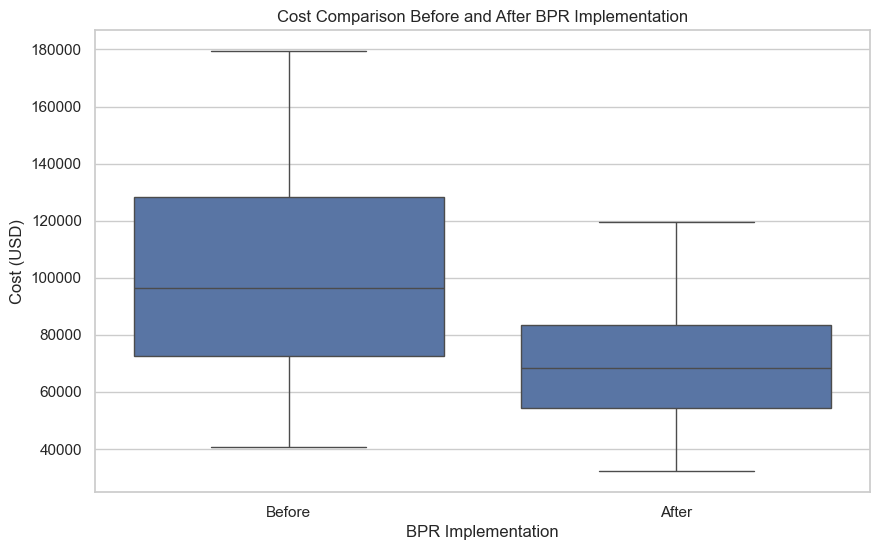

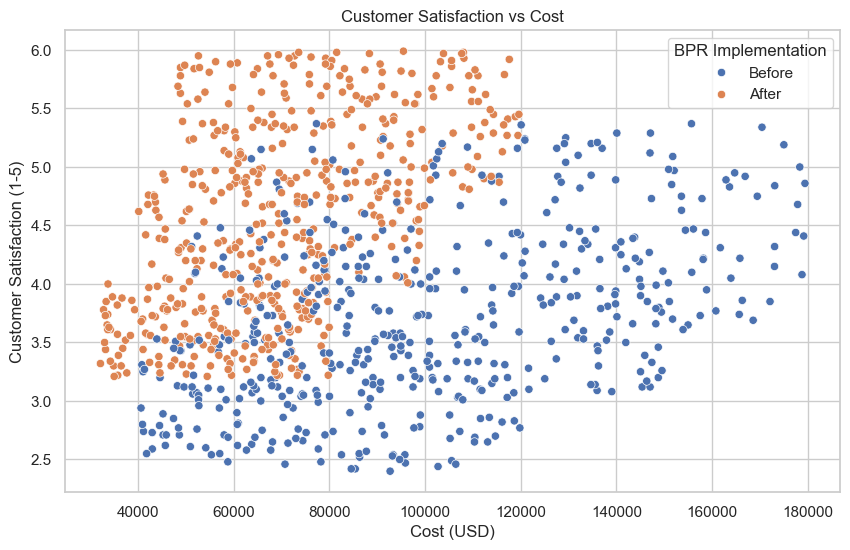

                    Cycle Time (days)     Cost (USD)  \
BPR Implementation                                     
After                       35.074510   70101.629412   
Before                      59.036735  100630.895918   

                    Defect Density (defects/KLOC)  \
BPR Implementation                                  
After                                    9.963216   
Before                                  19.453571   

                    Customer Satisfaction (1-5)  \
BPR Implementation                                
After                                  4.547961   
Before                                 3.713367   

                    Employee Productivity (tasks/hour)  \
BPR Implementation                                       
After                                         1.501235   
Before                                        0.987000   

                    Resource Utilization (%)  
BPR Implementation                            
After                         

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
path = r"C:\Users\rajee\Downloads\ibm intership\simulated_software_development_data.csv"
df = pd.read_csv(path)

# Check for missing values
print(df.isnull().sum())

# Conversion to proper data types
df['Process ID'] = df['Process ID'].astype(str)
df['BPR Implementation'] = df['BPR Implementation'].astype(str)
df['Project Complexity'] = df['Project Complexity'].astype(str)

# Display data types
print(df.dtypes)

# Set the style of the visualization
sns.set(style="whitegrid")

# Boxplot for cost comparison before and after BPR implementation
plt.figure(figsize=(10, 6))
sns.boxplot(x='BPR Implementation', y='Cost (USD)', data=df)
plt.title('Cost Comparison Before and After BPR Implementation')
plt.show()

# Scatter plot for Customer Satisfaction vs Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost (USD)', y='Customer Satisfaction (1-5)', hue='BPR Implementation', data=df)
plt.title('Customer Satisfaction vs Cost')
plt.show()

# Group by BPR Implementation and calculate mean
numeric_columns = df.select_dtypes(include='number').columns
grouped_data = df.groupby('BPR Implementation')[numeric_columns].mean()
print(grouped_data)

# Save summary statistics to a CSV file
summary_stats = df.describe()
summary_stats.to_csv('C:/Users/rajee/Downloads/fedex/summary_statistics.csv')
grouped_data.to_csv('C:/Users/rajee/Downloads/fedex/grouped_summary.csv')


In [4]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load the data
data = pd.read_csv(r"C:\Users\rajee\Downloads\ibm intership\simulated_software_development_data.csv")

# Print column names to verify
print(data.columns)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='role-dropdown',
        options=[
            {'label': 'Manager', 'value': 'manager'},
            {'label': 'Employee', 'value': 'employee'},
            # Add more roles as needed
        ],
        value='manager'  # Default value
    ),
    html.Div(id='kpi-container'),
    html.Div(id='suggestions-container')
])

# Callback for updating KPIs
@app.callback(
    Output('kpi-container', 'children'),
    Input('role-dropdown', 'value')
)
def update_kpis(role):
    if role == 'manager':
        kpis = [
            html.H3('Manager KPIs'),
            dcc.Graph(
                id='project-complexity-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Project Complexity'], 'type': 'bar', 'name': 'Project Complexity'}
                    ],
                    'layout': {
                        'title': 'Project Complexity'
                    }
                }
            ),
            dcc.Graph(
                id='cycle-time-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Cycle Time (days)'], 'type': 'line', 'name': 'Cycle Time'}
                    ],
                    'layout': {
                        'title': 'Cycle Time (days)'
                    }
                }
            ),
            dcc.Graph(
                id='cost-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Cost (USD)'], 'type': 'bar', 'name': 'Cost'}
                    ],
                    'layout': {
                        'title': 'Cost (USD)'
                    }
                }
            ),
            dcc.Graph(
                id='defect-density-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Defect Density (defects/KLOC)'], 'type': 'line', 'name': 'Defect Density'}
                    ],
                    'layout': {
                        'title': 'Defect Density (defects/KLOC)'
                    }
                }
            ),
            dcc.Graph(
                id='customer-satisfaction-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Customer Satisfaction (1-5)'], 'type': 'bar', 'name': 'Customer Satisfaction'}
                    ],
                    'layout': {
                        'title': 'Customer Satisfaction (1-5)'
                    }
                }
            ),
            dcc.Graph(
                id='employee-productivity-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Employee Productivity (tasks/hour)'], 'type': 'line', 'name': 'Employee Productivity'}
                    ],
                    'layout': {
                        'title': 'Employee Productivity (tasks/hour)'
                    }
                }
            ),
            dcc.Graph(
                id='resource-utilization-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Resource Utilization (%)'], 'type': 'bar', 'name': 'Resource Utilization'}
                    ],
                    'layout': {
                        'title': 'Resource Utilization (%)'
                    }
                }
            )
        ]
    elif role == 'employee':
        kpis = [
            html.H3('Employee KPIs'),
            dcc.Graph(
                id='employee-cycle-time-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Cycle Time (days)'], 'type': 'line', 'name': 'Cycle Time'}
                    ],
                    'layout': {
                        'title': 'Cycle Time (days)'
                    }
                }
            ),
            dcc.Graph(
                id='employee-productivity-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Employee Productivity (tasks/hour)'], 'type': 'bar', 'name': 'Employee Productivity'}
                    ],
                    'layout': {
                        'title': 'Employee Productivity (tasks/hour)'
                    }
                }
            ),
            dcc.Graph(
                id='employee-customer-satisfaction-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Customer Satisfaction (1-5)'], 'type': 'line', 'name': 'Customer Satisfaction'}
                    ],
                    'layout': {
                        'title': 'Customer Satisfaction (1-5)'
                    }
                }
            )
        ]
    else:
        kpis = [html.P('Select a role to view KPIs')]

    return kpis

# Callback for updating suggestions
@app.callback(
    Output('suggestions-container', 'children'),
    Input('role-dropdown', 'value')
)
def update_suggestions(role):
    if role == 'manager':
        suggestions = html.P('Smart Suggestion for Managers: Optimize resource allocation to reduce costs.')
    elif role == 'employee':
        suggestions = html.P('Smart Suggestion for Employees: Increase focus on quality to improve customer satisfaction.')
    else:
        suggestions = html.P('Select a role to view suggestions')

    return suggestions

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


Index(['Process ID', 'BPR Implementation', 'Project Complexity',
       'Cycle Time (days)', 'Cost (USD)', 'Defect Density (defects/KLOC)',
       'Customer Satisfaction (1-5)', 'Employee Productivity (tasks/hour)',
       'Resource Utilization (%)'],
      dtype='object')


In [5]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load data
data = pd.read_csv(r"C:\Users\rajee\Downloads\ibm intership\simulated_software_development_data.csv")
data = data.head(20)  # Select the first 20 rows for the graphs

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Dropdown(
        id='role-dropdown',
        options=[
            {'label': 'Manager', 'value': 'manager'},
            {'label': 'Employee', 'value': 'employee'},
            # Add more roles as needed
        ],
        value='manager'  # Default value
    ),
    html.Div(id='kpi-container'),
    html.Div(id='suggestions-container')
])

# Callback for updating KPIs
@app.callback(
    Output('kpi-container', 'children'),
    Input('role-dropdown', 'value')
)
def update_kpis(role):
    if role == 'manager':
        kpis = [
            html.H3('Manager KPIs'),
            dcc.Graph(
                id='project-complexity-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Project Complexity'], 'type': 'bar', 'name': 'Project Complexity'}
                    ],
                    'layout': {
                        'title': 'Project Complexity'
                    }
                }
            ),
            dcc.Graph(
                id='cycle-time-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Cycle Time (days)'], 'type': 'line', 'name': 'Cycle Time'}
                    ],
                    'layout': {
                        'title': 'Cycle Time (days)'
                    }
                }
            ),
            dcc.Graph(
                id='cost-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Cost (USD)'], 'type': 'bar', 'name': 'Cost'}
                    ],
                    'layout': {
                        'title': 'Cost (USD)'
                    }
                }
            ),
            dcc.Graph(
                id='defect-density-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Defect Density (defects/KLOC)'], 'type': 'line', 'name': 'Defect Density'}
                    ],
                    'layout': {
                        'title': 'Defect Density (defects/KLOC)'
                    }
                }
            ),
            dcc.Graph(
                id='customer-satisfaction-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Customer Satisfaction (1-5)'], 'type': 'bar', 'name': 'Customer Satisfaction'}
                    ],
                    'layout': {
                        'title': 'Customer Satisfaction (1-5)'
                    }
                }
            ),
            dcc.Graph(
                id='employee-productivity-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Employee Productivity (tasks/hour)'], 'type': 'line', 'name': 'Employee Productivity'}
                    ],
                    'layout': {
                        'title': 'Employee Productivity (tasks/hour)'
                    }
                }
            ),
            dcc.Graph(
                id='resource-utilization-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Resource Utilization (%)'], 'type': 'bar', 'name': 'Resource Utilization'}
                    ],
                    'layout': {
                        'title': 'Resource Utilization (%)'
                    }
                }
            )
        ]
    elif role == 'employee':
        kpis = [
            html.H3('Employee KPIs'),
            dcc.Graph(
                id='employee-cycle-time-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Cycle Time (days)'], 'type': 'line', 'name': 'Cycle Time'}
                    ],
                    'layout': {
                        'title': 'Cycle Time (days)'
                    }
                }
            ),
            dcc.Graph(
                id='employee-productivity-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Employee Productivity (tasks/hour)'], 'type': 'bar', 'name': 'Employee Productivity'}
                    ],
                    'layout': {
                        'title': 'Employee Productivity (tasks/hour)'
                    }
                }
            ),
            dcc.Graph(
                id='employee-customer-satisfaction-graph',
                figure={
                    'data': [
                        {'x': data['Process ID'], 'y': data['Customer Satisfaction (1-5)'], 'type': 'line', 'name': 'Customer Satisfaction'}
                    ],
                    'layout': {
                        'title': 'Customer Satisfaction (1-5)'
                    }
                }
            )
        ]
    else:
        kpis = [html.P('Select a role to view KPIs')]

    return kpis

# Callback for updating suggestions
@app.callback(
    Output('suggestions-container', 'children'),
    Input('role-dropdown', 'value')
)
def update_suggestions(role):
    if role == 'manager':
        suggestions = html.P('Smart Suggestion for Managers: Optimize resource allocation to reduce costs.')
    elif role == 'employee':
        suggestions = html.P('Smart Suggestion for Employees: Increase focus on quality to improve customer satisfaction.')
    else:
        suggestions = html.P('Select a role to view suggestions')

    return suggestions

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
